In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
import numpy as np
import random
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kshort_pn_4GeV_Jun13_ntuple/*.root")

In [3]:
def extend_array(arr, new_attr, new_attr_name):
    members={n:arr[n] for n in arr.fields}
    members[new_attr_name] = new_attr
    return ak.zip(members)

def add_angle(arr,br=['px','py','pz','e'],name="theta"):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    arr = extend_array(arr, part.theta, name)
    return arr

def get_vector(arr):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    return part

def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
    try:
        return ak.to_numpy(ak.flatten(x,axis=axis)) 
    except:
        return x

In [4]:
def test_smear(p, pz):
    px_array = []
    for part in px:
        for element in part:
            if element <= 100:
                px_perc = random.gauss(1,0.0270);
            elif element <= 400: 
                px_perc = random.gauss(1,0.0310);
            elif element <= 500: 
                px_perc = random.gauss(1,0.0325);
            elif element <= 1000: 
                px_perc = random.gauss(1,0.0340);
            elif element <= 1200: 
                px_perc = random.gauss(1,0.0435);
            elif element <= 2000:  
                px_perc = random.gauss(1,0.0380);
            else:    
                px_perc = random.gauss(1,0.04);
            px_array=np.append(px_array, [px_perc])
    py_array = []
    for part in py:
        for element in part:
            if element <= 100:
                py_perc = random.gauss(1,0.0375);
            elif element <= 350: 
                py_perc = random.gauss(1,0.0380);
            elif element <= 500: 
                py_perc = random.gauss(1,0.0425);
            elif element <= 1000: 
                py_perc = random.gauss(1,0.0480);
            elif element <= 1200: 
                py_perc = random.gauss(1,0.0498);
            elif element <= 2000: 
                py_perc = random.gauss(1,0.0550);
            else:    
                py_perc = random.gauss(1,0.0550);
            py_array=np.append(py_array, [py_perc])
    pz_array = []
    for part in pz:
        for element in part:
            if element <= 50:
                pz_perc = random.gauss(1,0.0404);
            elif element <= 100: 
                pz_perc = random.gauss(1,0.0410);
            elif element <= 250: 
                pz_perc = random.gauss(1,0.0415);
            elif element <= 500: 
                pz_perc = random.gauss(1,0.0420);
            elif element <= 1000: 
                pz_perc = random.gauss(1,0.0435);
            elif element <= 2000:  
                pz_perc = random.gauss(1,0.0477);
            elif element <= 3000:  
                pz_perc = random.gauss(1,0.0523);
            elif element <= 4000:  
                pz_perc = random.gauss(1,0.0573);            
            else:    
                pz_perc = random.gauss(1,0.06);
            pz_array=np.append(pz_array, [pz_perc])
    return (px_array, py_array, pz_array)

In [5]:
hists = {}
hists["sim_pion_theta1"] = hist.Hist("Sim Kaons",    
                                hist.Bin("theta", r"$\theta [rad]$", 80, 0, 2),
                            ) 
hists["sim_pion_theta2"] = hist.Hist("Sim Kaons",    
                                hist.Bin("theta", r"$\theta [rad]$", 80, 0, 2),
                            ) 
hists["sim_pion_sume1"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Reconstructed $K_s$ Kinetic Energy [MeV]", 80, 0, 4000), 
                            )
hists["sim_pion_sume2"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Reconstructed $K_s$ Kinetic Energy [MeV]", 80, 0, 4000), 
                            )  
hists["sim_pion_e1"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$\pi^\pm$ Energy [MeV]", 80, 0, 2500), 
                            )
hists["sim_pion_e2"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$\pi^\pm$ Energy [MeV]", 80, 0, 2500), 
                            )  
hists["sim_pion_mass1"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$Reconstructed $K_s$ Mass [MeV", 80, 400, 600), 
                            )
hists["sim_pion_mass2"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Reconstructed $K_s$ Mass [MeV]", 80, 400, 600), 
                            )  



In [6]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)
    
    sim_kaon_dau1 = ldmx_events['Sim_Kaon_dau1']
    sim_kaon_dau2 = ldmx_events['Sim_Kaon_dau2']
    
    kshort_pdgid = 310
    chargedpion_pdgid = 211
    pion_mass = 139
    kaon_mass = 497.648
    
    kshort_mask = (abs(sim_kaon_dau2.mompdgID)==kshort_pdgid)
    pidau_mask = (abs(sim_kaon_dau2.pdgID)==chargedpion_pdgid)
    lower_mask = ((-1*((sim_kaon_dau2.mome) - kaon_mass)+2000) <= (sim_kaon_dau2.electrone)) 
    

    pi1 = get_vector(sim_kaon_dau1[pidau_mask & kshort_mask & lower_mask])
    pi2 = get_vector(sim_kaon_dau2[pidau_mask & kshort_mask & lower_mask])
    pisum = (pi1 + pi2)
    pisum_energy_append = np.append(flat(pi1.t), flat(pi2.t))
    

    #new_px1 = test_smear(pi1.px,pi1.py,pi1.pz)[0]*flat(pi1.px)
    #new_px2 = test_smear(pi2.px,pi2.py,pi2.pz)[0]*flat(pi2.px)
    #new_py1 = test_smear(pi1.px,pi1.py,pi1.pz)[1]*flat(pi1.py)
    #new_py2 = test_smear(pi2.px,pi2.py,pi2.pz)[1]*flat(pi2.py)
    #new_pz1 = test_smear(pi1.px,pi1.py,pi1.pz)[2]*flat(pi1.pz)
    #new_pz2 = test_smear(pi2.px,pi2.py,pi2.pz)[2]*flat(pi2.pz)
    
    #new_psq1 = new_px1**2+new_py1**2+new_pz1**2
    #new_psq2 = new_px2**2+new_py2**2+new_pz2**2
    

    #from coffea.nanoevents.methods import vector
    #ak.behavior.update(vector.behavior)
    #pi1_track_smeared =  ak.zip({"x": new_px1,
    #                "y": new_py1,
    #                "z": new_pz1,
    #                "t": (np.sqrt(new_psq1+flat(pi1.mass)**2)),
    #                },
    #                with_name="LorentzVector")
    #pi2_track_smeared =  ak.zip({"x": new_px2,
    #                "y": new_py2,
    #                "z": new_pz2,
    #                "t": (np.sqrt(new_psq2+flat(pi2.mass)**2)),
    #                },
    #                with_name="LorentzVector")
    
    #pisum_track_smeared =(pi1_track_smeared+pi2_track_smeared)
    #pismeared_energy_append = np.append(flat(pi1_track_smeared.t),flat(pi2_track_smeared.t))
        
    
    #hists["sim_pion_theta1"].fill(
    #                             theta=flat(pisum.theta),
    #                            )
    #hists["sim_pion_theta2"].fill(
    #                             theta=flat(pisum_track_smeared.theta),
    #                            ) 
    #hists["sim_pion_sume1"].fill(
    #                             e=flat(pisum.t)-kaon_mass,
    #                            )
    #hists["sim_pion_sume2"].fill(
    #                             e=flat(pisum_track_smeared.t)-kaon_mass,
    #                            ) 
    #hists["sim_pion_e1"].fill(
    #                             e=flat(pisum_energy_append),
    #                            )
    #hists["sim_pion_e2"].fill(
    #                             e=flat(pismeared_energy_append),
    #                            ) 
    #hists["sim_pion_mass1"].fill(
    #                             e=flat(pisum.mass),
    #                            )
    #hists["sim_pion_mass2"].fill(
    #                             e=flat(pisum_track_smeared.mass),
    #                            )
    
    #how find average value:
    array_av=sum(flat(pi2.py))/len(flat(pi2.py))
    return abs(array_av)

In [7]:
nchunk = 0
p_count = 0
for chunk in ldmx_dict:
    #if nchunk >= 1: break
    nchunk += 1
    print('process',nchunk)
    px_value = ProcessChunk(chunk, hists)
    p_count = p_count + flat(px_value)
    print(p_count/nchunk)

process 1
21.39324717367849
process 2
15.718997555394326
process 3
20.990514758356465
process 4
18.159198417915636
process 5
16.562438391075226
process 6
19.83254652347118
process 7
24.74337526640876
process 8
30.599496094158837
process 9
28.65406449160192
process 10
27.23160934549993
process 11
31.903368560675652
process 12
31.02730125208264
process 13
30.947350335096793
process 14
31.332150037493108
process 15
29.461141544850747
process 16
28.13406968087316
process 17
26.634906271649374
process 18
27.466048044366843
process 19
26.687104680026277
process 20
25.841389194773353
process 21
26.011429231389446
process 22
26.42878162037614
process 23
25.751495403602643
process 24
27.891062741545355
process 25
27.072181963822423
process 26
26.0475118343849
process 27
27.609933071409824
process 28
28.819859302740156
process 29
29.506128629286206
process 30
28.7698924515924
process 31
30.518961151104786
process 32
29.935275980670113
process 33
29.542319817522333
process 34
30.399183031070766
p

<Hist (theta) instance at 0x1267a7640>


KeyError: ()

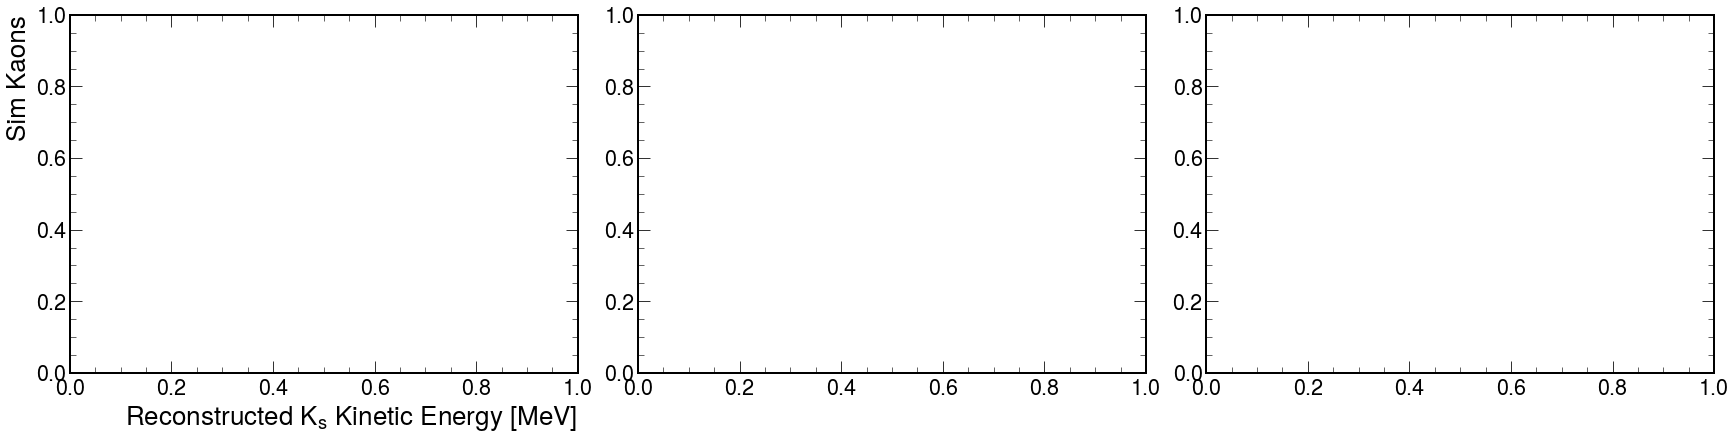

In [8]:
print(hists["sim_pion_theta1"])
fig, ax = plt.subplots(1,3,figsize=(24,6), constrained_layout=True)

hist.plot1d(hists["sim_pion_sume1"],ax=ax[0],clear=False);
hist.plot1d(hists["sim_pion_sume2"],ax=ax[0],clear=False);
leg = ax[0].legend([r'Truth $\pi^\pm$', 'Smeared $\pi^\pm$'])

hist.plot1d(hists["sim_pion_theta1"],ax=ax[1],clear=False);
hist.plot1d(hists["sim_pion_theta2"],ax=ax[1],clear=False);
leg = ax[1].legend([r'Truth $\pi^\pm$', 'Smeared $\pi^\pm$'])

hist.plot1d(hists["sim_pion_mass1"],ax=ax[2],clear=False);
hist.plot1d(hists["sim_pion_mass2"],ax=ax[2],clear=False);
leg = ax[2].legend([r'Truth $\pi^\pm$', 'Smeared $\pi^\pm$'])





fig, ax = plt.subplots()

hist.plot1d(hists["sim_pion_e1"],ax=ax,clear=False);
hist.plot1d(hists["sim_pion_e2"],ax=ax,clear=False);
leg = ax.legend([r'Truth $\pi^\pm$', 'Smeared $\pi^\pm$'])


